In [1]:
import numpy as np
from numpy import random
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
x_init = -1

dt = 0.01
time_horizon = 1000
num_steps = int(time_horizon/dt)

num_trajectories = 10000
jump_mult = 2

t = np.linspace(0, time_horizon, num_steps)

noise   = random.normal(loc=0.0, scale=dt**(1/2), size=(num_trajectories, num_steps))
epsilon = (4.29 * 2 / np.log(time_horizon)) * jump_mult

def const_neg_potential(x, t, period=100):
    """Defines the potential function."""
    t = 25
    a1, a2, a3, a4, a5, a6 = 0, -3.2, 3*np.sin(2*np.pi*t/period), 0.1, -(3/5)*3*np.sin(2*np.pi*t/period), 1
    all_scale = 1.13
    
    return all_scale * (a6*6*x**5 + a5*5*x**4 + a4*4*x**3 + a3*3*x**2 + a2*2*x + a1)

def mu(x, t):
    return -const_neg_potential(x, t)

def sigma(x, t):
    return epsilon ** (1/2)

def simulate(x_init, dt, num_trajectories, num_steps, time_vec, noise):
    jump_times = np.empty((num_trajectories, ))
    x = np.zeros((num_steps, ))
    x[0] = x_init
    
    for j in tqdm(range(num_trajectories)):
        for i in range(num_steps - 1):
            curr_t = time_vec[i]
            curr_x = x[i]
            dW = noise[j, i]
            
            x[i+1] = (curr_x + 
                        mu(curr_x, curr_t) * dt + 
                        sigma(curr_x, curr_t) * dW)

            if np.sign(x[i+1]) != np.sign(x[i]):
                jump_times[j] = curr_t
                break
    
    return x, jump_times

In [3]:
x, jump_times = simulate(x_init, dt, num_trajectories, num_steps, t, noise)

100%|██████████| 10000/10000 [00:15<00:00, 663.71it/s]


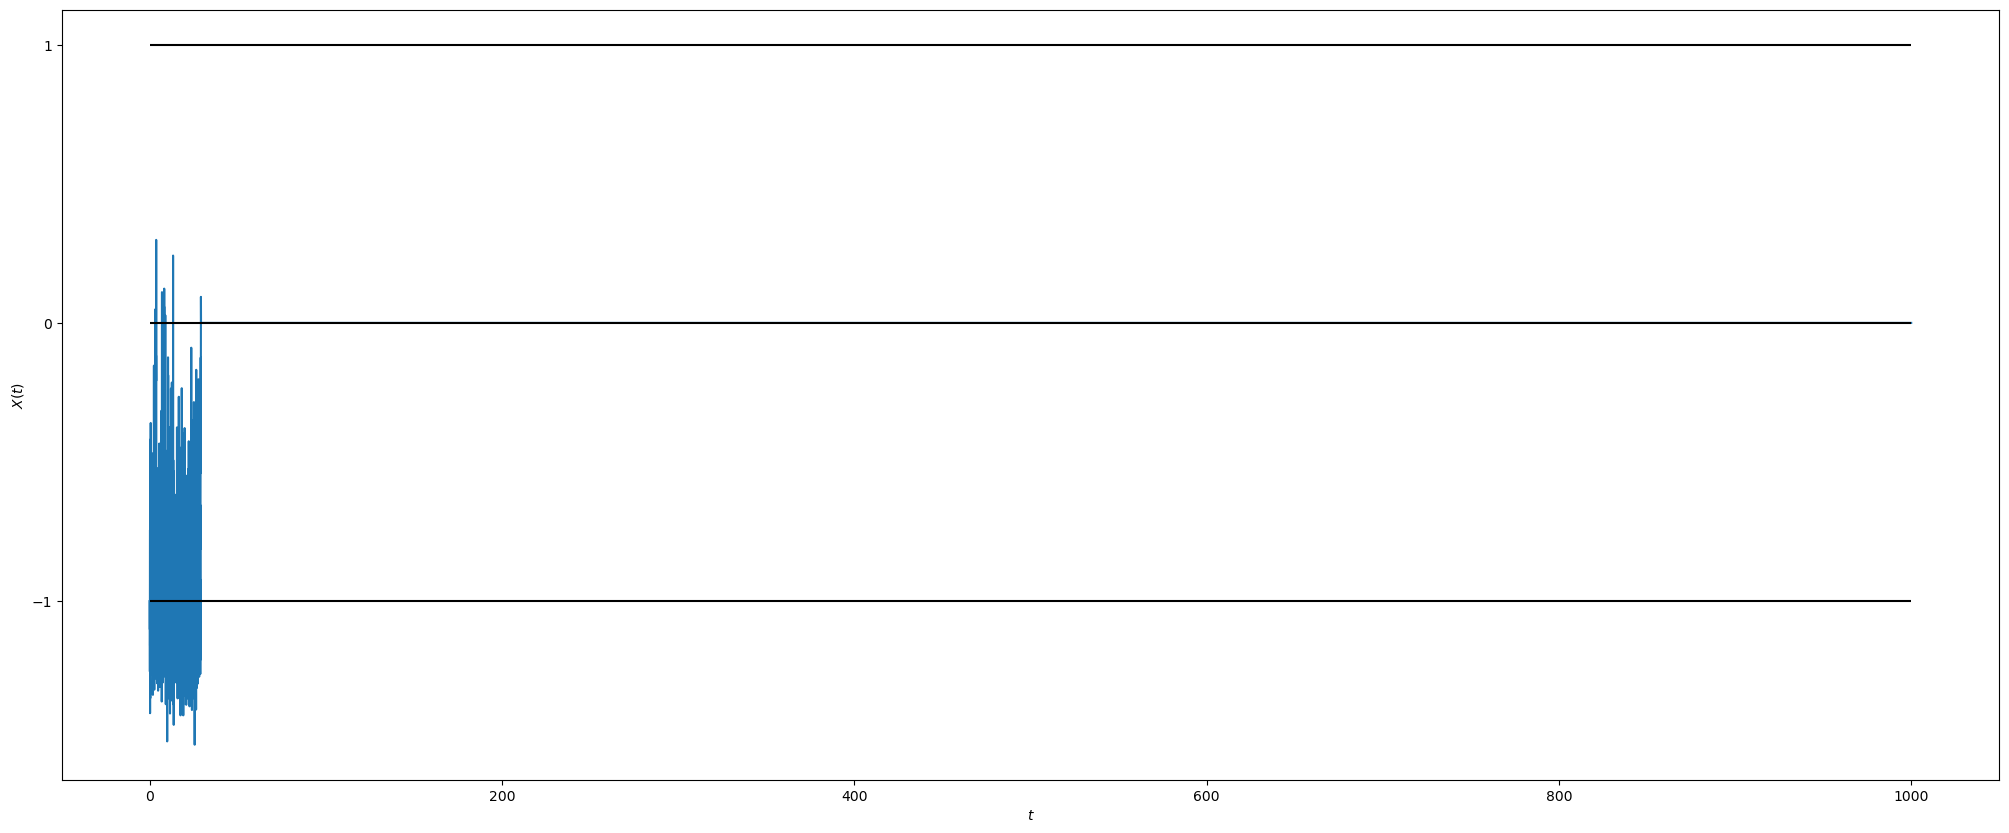

In [4]:
plt.figure(figsize=(25,10))
plt.plot(t, x)  # Plot each trajectory
plt.yticks([-2, -1, 0, 1, 2])
plt.hlines([1, -1, 0], xmax=t[-1], xmin=t[0], colors="black")
plt.xlabel('$t$')
plt.ylabel('$X(t)$')
plt.show()

In [5]:
np.save('interval_lengths.npy', jump_times)